In [4]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv('Salaries.csv')

In [5]:
df=pd.DataFrame(data=data)

In [6]:
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [7]:
df.shape

(397, 6)

In [8]:
df.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

In [9]:
df.dtypes

rank             object
discipline       object
yrs.since.phd     int64
yrs.service       int64
sex              object
salary            int64
dtype: object

In [10]:
df.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

<AxesSubplot:>

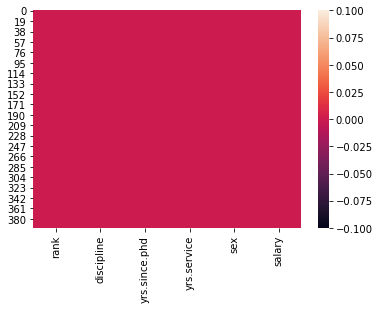

In [11]:
sns.heatmap(df.isnull())

In [47]:
df=df.drop(['sex'],axis=1,inplace=True)

In [51]:
df

,rank,discipline,yrs.since.phd,yrs.service,salary
0,2,1,19,18,139750
1,2,1,20,16,173200
2,1,1,4,3,79750
3,2,1,45,39,115000
4,2,1,40,41,141500
...,...,...,...,...,...
392,2,0,33,30,103106
393,2,0,31,19,150564
394,2,0,42,25,101738
395,2,0,25,15,95329


In [52]:
from sklearn.preprocessing import LabelEncoder

In [54]:
le=LabelEncoder()
#df['rank']=le.fit_transform(df['rank'])

list1=['rank','discipline']
for val in list1:
    df[val]=le.fit_transform(df[val].astype(str))

df

,rank,discipline,yrs.since.phd,yrs.service,salary
0,2,1,19,18,139750
1,2,1,20,16,173200
2,1,1,4,3,79750
3,2,1,45,39,115000
4,2,1,40,41,141500
...,...,...,...,...,...
392,2,0,33,30,103106
393,2,0,31,19,150564
394,2,0,42,25,101738
395,2,0,25,15,95329


In [55]:
df.describe()

,rank,discipline,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000,397.000000,397.000000
mean,1.508816,0.544081,22.314861,17.614610,113706.458438
std,0.757486,0.498682,12.887003,13.006024,30289.038695
min,0.000000,0.000000,1.000000,0.000000,57800.000000
25%,1.000000,0.000000,12.000000,7.000000,91000.000000
50%,2.000000,1.000000,21.000000,16.000000,107300.000000
75%,2.000000,1.000000,32.000000,27.000000,134185.000000
max,2.000000,1.000000,56.000000,60.000000,231545.000000


In [56]:
df.skew()

rank            -1.151164
discipline      -0.177684
yrs.since.phd    0.300880
yrs.service      0.650569
salary           0.714568
dtype: float64

rank                AxesSubplot(0.125,0.657941;0.168478x0.222059)
discipline       AxesSubplot(0.327174,0.657941;0.168478x0.222059)
yrs.since.phd    AxesSubplot(0.529348,0.657941;0.168478x0.222059)
yrs.service      AxesSubplot(0.731522,0.657941;0.168478x0.222059)
salary              AxesSubplot(0.125,0.391471;0.168478x0.222059)
dtype: object

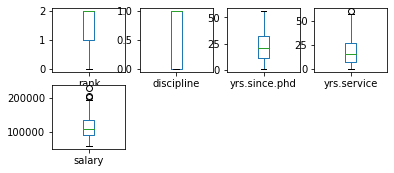

In [57]:
df.plot(kind='box',subplots=True,layout=(3,4))

<AxesSubplot:>

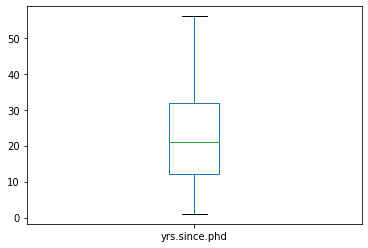

In [58]:
df['yrs.since.phd'].plot.box()

<AxesSubplot:>

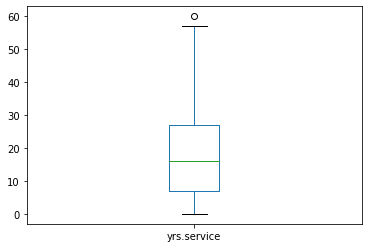

In [59]:
df['yrs.service'].plot.box()

<AxesSubplot:>

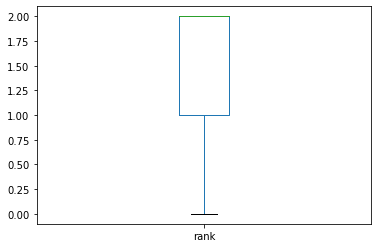

In [60]:
df['rank'].plot.box()

<AxesSubplot:ylabel='Frequency'>

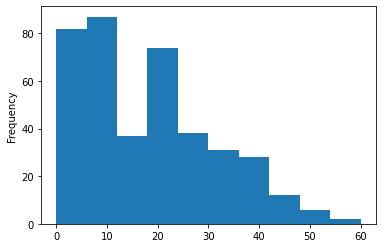

In [61]:
df['yrs.service'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

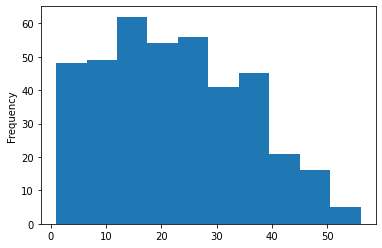

In [62]:
df['yrs.since.phd'].plot.hist()

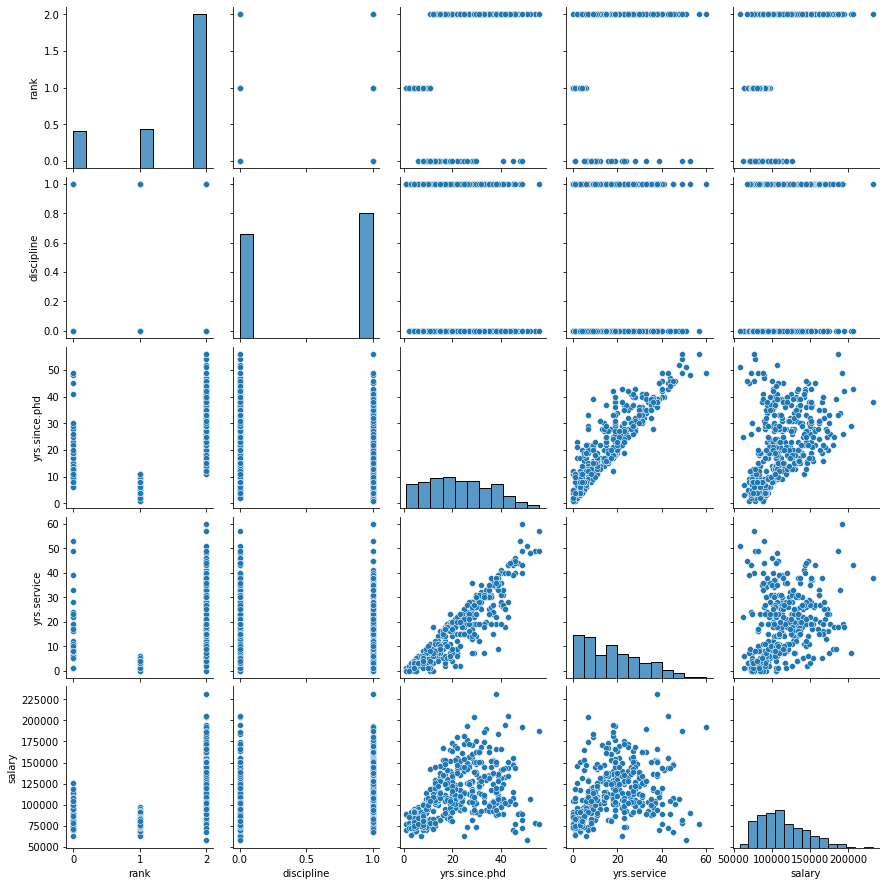

In [63]:
sns.pairplot(df)

In [64]:
df.corr()

,rank,discipline,yrs.since.phd,yrs.service,salary
rank,1.000000,-0.086266,0.525500,0.447499,0.522207
discipline,-0.086266,1.000000,-0.218087,-0.164599,0.156084
yrs.since.phd,0.525500,-0.218087,1.000000,0.909649,0.419231
yrs.service,0.447499,-0.164599,0.909649,1.000000,0.334745
salary,0.522207,0.156084,0.419231,0.334745,1.000000


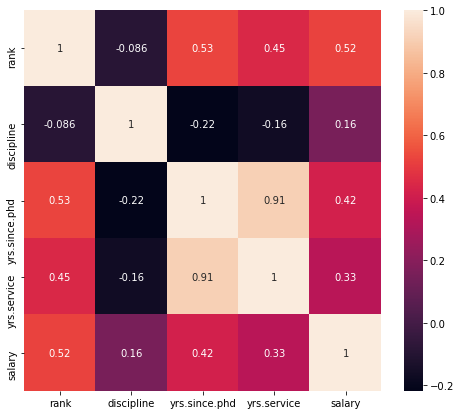

In [65]:
corr_hmap=df.corr()
plt.figure(figsize=(8,7))
sns.heatmap(corr_hmap,annot=True)
plt.show()

# Data Cleaning

In [68]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
z

array([[0.64925739, 0.91540317, 0.25754973, 0.02966908, 0.86091884],
       [0.64925739, 0.91540317, 0.17985426, 0.12429986, 1.96667226],
       [0.67256406, 0.91540317, 1.42298184, 1.12509795, 1.12249537],
       ...,
       [0.64925739, 1.09241483, 1.52944617, 0.56856036, 0.39564018],
       [0.64925739, 1.09241483, 0.20862311, 0.20128433, 0.60750187],
       [0.67256406, 1.09241483, 1.11219995, 1.04811348, 1.08001725]])

In [69]:
threshold=3 #threshold for zscore values ---> above 3 are considered outliers
print(np.where(z>3))

(array([ 43, 131, 330, 364]), array([4, 3, 3, 4]))


In [70]:
z[43][4]

3.8953773005457175

In [71]:
z[364][4]

3.034410248101501

In [77]:
df_new=df[(z<3).all(axis=1)]

In [78]:
print(df.shape)

(397, 5)


In [79]:
print(df_new.shape)

(393, 5)


In [80]:
df=df_new

In [99]:
x=df.iloc[:,0:-1] #all rows and 12 column
x.head()

,rank,discipline,yrs.since.phd,yrs.service
0,2,1,19,18
1,2,1,20,16
2,1,1,4,3
3,2,1,45,39
4,2,1,40,41


In [100]:
y=df.iloc[:,-1] #all rows and 1 column
y.head()

0    139750
1    173200
2     79750
3    115000
4    141500
Name: salary, dtype: int64

In [83]:
x.shape

(393, 4)

In [84]:
y.shape

(393,)

Transforming data to remove skewness

In [101]:
from sklearn.preprocessing import power_transform

In [102]:
x=power_transform(x,method='yeo-johnson')

In [103]:
x

array([[ 0.69481738,  0.91457564, -0.11344983,  0.26888583],
       [ 0.69481738,  0.91457564, -0.03455335,  0.1209006 ],
       [-1.0753989 ,  0.91457564, -1.6242611 , -1.28449532],
       ...,
       [ 0.69481738, -1.09340328,  1.42772852,  0.72581897],
       [ 0.69481738, -1.09340328,  0.33874878,  0.04312953],
       [-1.0753989 , -1.09340328, -1.12908354, -1.11979784]])

In [105]:
from sklearn.preprocessing import StandardScaler

In [107]:
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.69481738,  0.91457564, -0.11344983,  0.26888583],
       [ 0.69481738,  0.91457564, -0.03455335,  0.1209006 ],
       [-1.0753989 ,  0.91457564, -1.6242611 , -1.28449532],
       ...,
       [ 0.69481738, -1.09340328,  1.42772852,  0.72581897],
       [ 0.69481738, -1.09340328,  0.33874878,  0.04312953],
       [-1.0753989 , -1.09340328, -1.12908354, -1.11979784]])

In [118]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=25)

In [119]:
x_train.shape

(263, 4)

In [120]:
y_train.shape

(263,)

In [121]:
x_test.shape

(130, 4)

In [122]:
y_test.shape

(130,)

In [123]:
lm = LinearRegression()

In [124]:
lm.fit(x_train,y_train)

LinearRegression()

In [125]:
lm.coef_

array([13472.72367059,  7114.29018378, 12594.5698588 , -5539.14521062])

In [126]:
lm.intercept_ 

114676.76851570653

In [127]:
lm.score(x_train,y_train)

0.44486511571817355

In [128]:
#predict the value
pred=lm.predict(x_test)
print('Predicted result salaries:',pred)
print('actual salary',y_test)

Predicted result salaries: [ 81408.76861682  87151.54203728 115351.65453065  88325.79878695
 121524.33561801 123458.36475614 116505.0413522  133663.6475927
 134790.37606749 117736.56663718 133491.76472178  87923.39856416
  95798.84591093 125334.37252301 136462.26615297 134426.35766841
 122081.37740937 121350.84722111 130316.91658001 124116.75431676
 116626.34564325 125461.50301861 121738.65660639 114763.68236672
  92332.66950281 130152.82944674 108883.15499777 113382.6126051
 130857.84402416 123333.19103059 112326.46845096 135809.68030454
  80776.84338077 118454.9621925  126611.81313749 132740.30687903
 118819.21914085 122917.35269698 121441.89044526 130962.66383843
 138202.88377909  92440.62570448  93337.73589667  79551.53431283
  74176.60611496 126349.32114543 116491.18719343 142063.27452504
  82913.60967883 129609.63820151  97439.34253106 139359.58218201
  96657.49325403  84391.82943022 121630.20228032  94408.63629585
 123952.29224136 119574.77425288  79198.64767954 120715.53966037


In [129]:
print('error:')

print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))

print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred)))

error:
Mean absolute error: 16801.841680206042
Mean squared error: 467006000.86430794
Root Mean Squared Error: 21610.32162797


In [130]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

0.339810518209817


In [131]:
df=pd.DataFrame(pred)
df.to_csv('salaries_pred_submission.csv')

Model Saving

In [135]:
import pickle
filename='salaries.pkl'
pickle.dump(lm, open(filename,'wb'))